In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def gaussian(t, mathexp, dispersion):
    return 1./(dispersion*np.sqrt(2.*np.pi)) * np.exp(-np.power(t - mathexp, 2.) / (2 * np.power(dispersion, 2.))) 

Initial version of dataset generation:
Input: $T,P,{x_i}\ \to\ T,{c_i}$,
which can transform again to  $T,P,{x_i}$ (provided the equation of state) species:

|| H2 | H* | O* | O2 | H2O | HO* | HO2 | H2O2 | Ar | N2  ||

Ar and N$_2$ are inert and mostly contribute to the heat capacity. At this stage assume concentrations of Ar and N$_2$ equalzero.

With any set of reasonable conditions, H$_2$O$_2$ and HO$_2$ concentrations are always low ($<10^{-4}$).
Interestingly, this is not the case for H* and O* ($x < 0.2$).
I have checked the material balance in the initial program: it holds.

$2c_{\rm H2} + c_{\rm *OH} + c_{\rm H} + c_{\rm O2H} + 2c_{\rm H2O2} + 2c_{\rm H2O} = {\rm const} $ 

and corresponds to ${x_i},P,T$ provided the ideal EoS

What I suggest for the “initial dataset”: generate points as follows:

Concentrations: 

H2: Gaussian distribution, $\mu =0.4,\sigma=0.15$

O2: Gaussian distribution, $ \mu=0.2,\sigma=0.22$

H2O: Gaussian distribution, $ \mu=0.15,\sigma=0.3$ 

H* : Gaussian distribution, $ \mu=0.1,\sigma=0.04$, upper limit 0.2

O* : Gaussian distribution, $ \mu=0.1,\sigma=0.04$, upper limit 0.2

H2O2,HO2: uniform distribution, $ \mu=10^{-4}$  = 10-4, upper limit $2*10^{-4}$

HO* : Gaussian distribution, upper limit 0.1 $ \mu=0.05,\sigma=0.04$, upper limit 0.1

H2O2: uniform distribution, $\mu = 10^{-4}$, upper limit 10-4

T: uniform, $\mu =2000$K:

P: log uniform, $\mu =300$kPa (not much, interestingly)

Assume that $x_i$ are independent, as they are scaled in the Rosatom chembox code (sum = 1)
However, we should take this into acct, cause if for randomness of the distribution $x_{\rm H2}, x_{\rm O2},x_{\rm H2O}$ are low, this can increase $x_{\rm H*}$ and $x_{\rm O*}$ above reasonable level (I will continue to explore this, cause diffusion cannot increase the concentration of radicals if they are low in the beiboring cells too)

A solution is simply reject any point where $x_{\rm H*}$ or $x_{\rm O*}$ exceeds 0.2. or $x_{\rm HO*}$ exceeds 0.1.


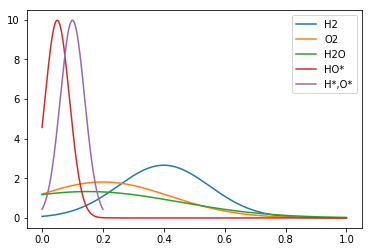

In [7]:
lowlim=0
highlim=1
mu=0.4
sigma=0.15

npoints=500
p_h2=[];p_o2=[];p_h=[];p_o=[];p_oh=[];p_h2o=[];p_h202=[];p_ho2=[]

x=np.linspace(lowlim, highlim, num=npoints, endpoint=True, retstep=False, dtype=float)

fig1=plt.figure()

for i in range(npoints):
    p_h2.append(gaussian(t=x[i],mathexp=mu,dispersion=sigma))
plt.plot(x,p_h2,label='H2')

lowlim=0
highlim=1
mu=0.2
sigma=0.22
for i in range(npoints):
    p_o2.append(gaussian(t=x[i],mathexp=mu,dispersion=sigma))
plt.plot(x,p_o2,label='O2')

lowlim=0
highlim=1
mu=0.15
sigma=0.3
for i in range(npoints):
    p_h2o.append(gaussian(t=x[i],mathexp=mu,dispersion=sigma))
plt.plot(x,p_h2o,label='H2O')

lowlim=0
highlim=0.1
mu=0.05
sigma=0.04
for i in range(npoints):
    p_oh.append(gaussian(t=x[i],mathexp=mu,dispersion=sigma))
plt.plot(x,p_oh,label='HO*')

lowlim=0
highlim=0.2
mu=0.1
sigma=0.04
x=np.linspace(lowlim, highlim, num=npoints, endpoint=True, retstep=False, dtype=float)
for i in range(npoints):
    p_h.append(gaussian(t=x[i],mathexp=mu,dispersion=sigma))
plt.plot(x,p_h,label='H*,O*')

plt.legend()
fig1.show()
